# Apple Music Data Science Analysis (modified from original 2020 version)

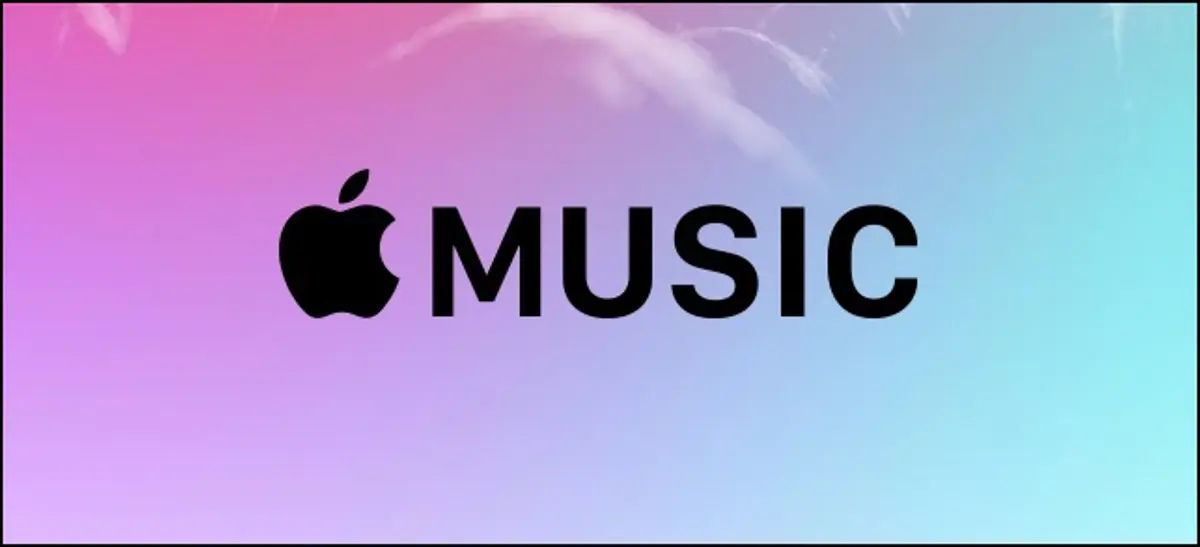

## Introduction:

*Context*: We will use Benjamin Bellman’s Itunes Library to conduct this analysis. All the music
that Ben listens too comes from Itunes (not Apple Music) and he currently still uses it. His whole
music library can be found here. These are all the songs that he has kept adding onto in his library
since 2008 (when he was 13). There are a couple of important of disclosures which will be further
addressed during the analysis:
- The Data comes from Itunes.
- It was exported from Itunes to Excel in csv format.
- A column for country of origin and genre were manually created in Excel.
- Therefore, the Genre and Country columns may have some strange values.
- In addition, the Genre’s are subjective. Many songs could be either Electronic or Dance.
- Some of the data is incomplete. Not all albums are available, for example.
- Ben got a new macbook back in 2013. This means three things:

<br> 1) When information was transfered from his old Mac to the New one, the play count of songs before 2013 was erased.

<br> 2) Another consequence is that a large majority of songs prior to 2013 were added on 9/4/2013.This is why this day will record the most added songs and why overall, many songs were
added in 2013.

<br> 3) Some songs were sadly lost, erased or deleted (~100).

In [1]:
## Let's import the packages we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from datetime import datetime as dt

In [2]:
## Let's load our data and preview it.
music = pd.read_csv('.\Apple_Music_Raw_Data.csv', header = None)
music.head()

,0,1,2,3,4,5,6,7
0,Blankets,2:54,Fantompower,4 AM Coding Session,35,"12/2/21, 8:01 AM","12/5/21, 7:20 PM",Lowfi
1,Liquid Larry,1:22,I'm Surf,4 AM Coding Session,35,"12/2/21, 8:00 AM","12/5/21, 7:17 PM",Lowfi
2,Epilogue (Original Mix),0:50,Mell-o,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:16 PM",Lowfi
3,Beautiful escape,3:41,Hoogway,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:15 PM",Lowfi
4,Waiting For Your Call,3:05,Jordy Chandra,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:12 PM",Lowfi


In [3]:
## We have no columns, let's rename them.
columns = ['song_title','duration','music_artist','album','plays','date_added','last_played','genre']
music.columns = columns
music.head()

,song_title,duration,music_artist,album,plays,date_added,last_played,genre
0,Blankets,2:54,Fantompower,4 AM Coding Session,35,"12/2/21, 8:01 AM","12/5/21, 7:20 PM",Lowfi
1,Liquid Larry,1:22,I'm Surf,4 AM Coding Session,35,"12/2/21, 8:00 AM","12/5/21, 7:17 PM",Lowfi
2,Epilogue (Original Mix),0:50,Mell-o,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:16 PM",Lowfi
3,Beautiful escape,3:41,Hoogway,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:15 PM",Lowfi
4,Waiting For Your Call,3:05,Jordy Chandra,4 AM Coding Session,36,"12/2/21, 8:00 AM","12/5/21, 7:12 PM",Lowfi


In [4]:
## Let's look at the info. 
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_title    3006 non-null   object
 1   duration      3006 non-null   object
 2   music_artist  3006 non-null   object
 3   album         1625 non-null   object
 4   plays         2991 non-null   object
 5   date_added    3006 non-null   object
 6   last_played   2991 non-null   object
 7   genre         3006 non-null   object
dtypes: object(8)
memory usage: 188.0+ KB


This is how Apple_Music spits out music. However, being passionate about my music, I manually added the countries for all artists in the dataset. Let's see what this looks like.

In [5]:
## We load and preview the new data. 
music = pd.read_csv('.\Music_Data_Countries.csv')
music.head()

,Song ID,Song Title,Lenght,Country,Artist,Album,Plays,Date Added,Last Played,Genre,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic,NaN,NaN,NaN,NaN
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance,NaN,NaN,NaN,NaN
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative,NaN,NaN,NaN,NaN
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance,NaN,NaN,NaN,NaN
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative,NaN,NaN,NaN,NaN


In [6]:
##We data a look at the columns 
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song ID       2979 non-null   int64  
 1   Song Title    2979 non-null   object 
 2   Lenght        2979 non-null   object 
 3   Country       2979 non-null   object 
 4   Artist        2979 non-null   object 
 5   Album         1608 non-null   object 
 6   Plays         2964 non-null   float64
 7   Date Added    2979 non-null   object 
 8   Last  Played  2964 non-null   object 
 9   Genre         2979 non-null   object 
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(5), int64(1), object(8)
memory usage: 326.0+ KB


In [7]:
## We drop columns which we do not need and contain no values. 
music = music.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])
music.head()

,Song ID,Song Title,Lenght,Country,Artist,Album,Plays,Date Added,Last Played,Genre
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative


In [8]:
## And rename the ones we do. 
columns = ['song_id','title','time','country','artist','album','plays','date_added','last_played','genre']
music.columns = columns
music.head()

,song_id,title,time,country,artist,album,plays,date_added,last_played,genre
0,1,The Set-Up,4:14,USA,Moodyman,NaN,30.0,"11/22/21, 7:56 AM","11/23/21, 10:29 AM",Electronic
1,2,Italo Disco,6:56,FR,Lifelike,NaN,53.0,"11/22/21, 7:54 AM","11/23/21, 7:59 PM",Dance
2,3,Horizon (Japan bonus track),4:25,FR,Daft Punk,Random Access Memories,67.0,"11/21/21, 11:16 AM","11/23/21, 3:20 PM",Alternative
3,4,Aerodynamic (Daft Punk Remix),6:11,FR,Daft Punk,NaN,44.0,"11/21/21, 11:14 AM","11/23/21, 7:30 PM",Dance
4,5,Metamodernity,2:43,USA,Vansire,NaN,64.0,"11/18/21, 5:09 PM","11/23/21, 6:10 PM",Alternative


In [9]:
## Let's take a look again/
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      2979 non-null   int64  
 1   title        2979 non-null   object 
 2   time         2979 non-null   object 
 3   country      2979 non-null   object 
 4   artist       2979 non-null   object 
 5   album        1608 non-null   object 
 6   plays        2964 non-null   float64
 7   date_added   2979 non-null   object 
 8   last_played  2964 non-null   object 
 9   genre        2979 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 232.9+ KB


In [10]:
## We need to convert our date_added and time columnns to datetime. 
music.date_added = pd.to_datetime(music.date_added)
music.time = pd.to_datetime(music.time,format= '%M:%S').apply(lambda x : x - (pd.to_datetime('1900-01-01 00:00:00')))
music['year_added'] = pd.DatetimeIndex(music['date_added']).year
music['month_added'] = pd.DatetimeIndex(music['date_added']).month
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   song_id      2979 non-null   int64          
 1   title        2979 non-null   object         
 2   time         2979 non-null   timedelta64[ns]
 3   country      2979 non-null   object         
 4   artist       2979 non-null   object         
 5   album        1608 non-null   object         
 6   plays        2964 non-null   float64        
 7   date_added   2979 non-null   datetime64[ns] 
 8   last_played  2964 non-null   object         
 9   genre        2979 non-null   object         
 10  year_added   2979 non-null   int64          
 11  month_added  2979 non-null   int64          
dtypes: datetime64[ns](1), float64(1), int64(3), object(6), timedelta64[ns](1)
memory usage: 279.4+ KB


In [11]:
music.head()

,song_id,title,time,country,artist,album,plays,date_added,last_played,genre,year_added,month_added
0,1,The Set-Up,0 days 00:04:14,USA,Moodyman,NaN,30.0,2021-11-22 07:56:00,"11/23/21, 10:29 AM",Electronic,2021,11
1,2,Italo Disco,0 days 00:06:56,FR,Lifelike,NaN,53.0,2021-11-22 07:54:00,"11/23/21, 7:59 PM",Dance,2021,11
2,3,Horizon (Japan bonus track),0 days 00:04:25,FR,Daft Punk,Random Access Memories,67.0,2021-11-21 11:16:00,"11/23/21, 3:20 PM",Alternative,2021,11
3,4,Aerodynamic (Daft Punk Remix),0 days 00:06:11,FR,Daft Punk,NaN,44.0,2021-11-21 11:14:00,"11/23/21, 7:30 PM",Dance,2021,11
4,5,Metamodernity,0 days 00:02:43,USA,Vansire,NaN,64.0,2021-11-18 17:09:00,"11/23/21, 6:10 PM",Alternative,2021,11


## Let's explore our data and get more information 

In [12]:
## Let's take a look at how many unique genres and artists we have. 
print('Total Different Genres: ' + str(music.genre.nunique()))
print('Total Unique Artists: ' + str(music.artist.nunique()))
print('Total Unique Countries: ' + str(music.country.nunique()))
print('Total Different Albums: ' + str(music.album.nunique()))
print('Total Songs: '+ str(music.song_id.count()))

Total Different Genres: 116
Total Unique Artists: 1563
Total Unique Countries: 44
Total Different Albums: 1088
Total Songs: 2979


In [13]:
## Let's get some summary stats for song length and time: 
music[['time','plays']].describe()

,time,plays
count,2979,2964.000000
mean,0 days 00:03:59.738167170,44.740553
std,0 days 00:01:14.364438869,49.577872
min,0 days 00:00:30,1.000000
25%,0 days 00:03:18,14.000000
50%,0 days 00:03:47,29.000000
75%,0 days 00:04:29,59.000000
max,0 days 00:16:39,1001.000000


In [14]:
## Ok, not all of our songs have a play count. So we need to put 0 for all of them. 
music.plays.fillna(0, inplace =True)

In [15]:
## Cool! Looks like it worked and we had 0 
music[music['plays']== 0]['title'].count()

15

In [16]:
## Let's look one more time. 
music[['time','plays']].describe()

,time,plays
count,2979,2979.000000
mean,0 days 00:03:59.738167170,44.515274
std,0 days 00:01:14.364438869,49.554178
min,0 days 00:00:30,0.000000
25%,0 days 00:03:18,14.000000
50%,0 days 00:03:47,28.000000
75%,0 days 00:04:29,58.000000
max,0 days 00:16:39,1001.000000


The median went down by 

## Preliminary EDA

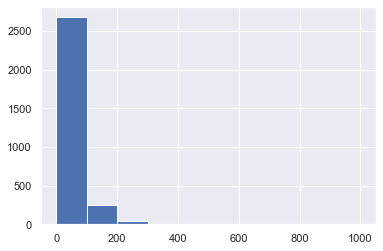

In [18]:
sns.set()
_ = music.plays.hist(bins=10)

In [ ]:
## Ok , looks like there are a couple of outliers...


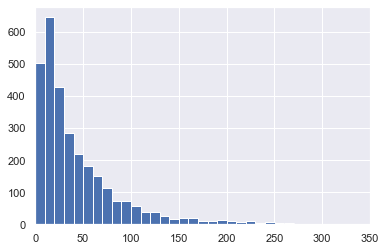

In [19]:
_ = music.plays.hist(bins=100)
_ = plt.xlim([0,350])

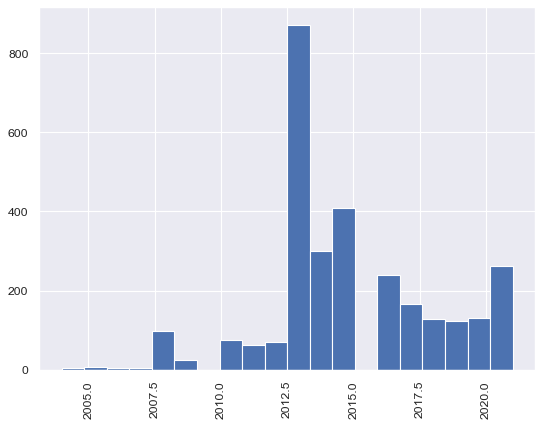

In [25]:
## Ok, when did we add the song: 
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
_ = music.year_added.hist(bins=20)
_ = plt.xticks(rotation = 90) 

## We want to create three seperate dataframes: 
- by_artist 
- by_genres
- by_country

In [ ]:
## We create our by country_dataframe. 
by_country = music.groupby('country').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()

                                     
by_country.head()

In [ ]:
music.replace(
    {'French Pop': "Foreign", "Alternative et rock latino":"Foreign", "Alternativo & Rock Latino": "Foreign", 
     "Arabic": "Foreign", "Brazilian": "Foreign", "Chanson": "Foreign", "Kpop": "Foreign", "Latin":"Foreign", 
     "Latino": "Foreign", "Musique francophone": "Foreign", "Musique pour enfants": "Foreign", 
     "Musiques du monde": "Foreign", "Variété française": "Foreign", "Variete Francaise": "Foreign", 
     "World": "Foreign", "Vari_t_ fran_aise": "Foreign",'K-Pop':"Foreign"}, inplace=True)

music.replace(
    {'Club': "EDM", "Dance": "EDM", "Dance;Trance;Tech": "EDM","Deep House": "EDM", "Disco": "EDM", 
     "Dubstep": "EDM", "EDM": "EDM", "Electronic": "EDM", "Electronic;House;Dance;Techno": "EDM", 
     "Electronic;Jazz;Dance": "EDM", "Electronica": "EDM", "Electronica/Dance": "EDM","Electronique": "EDM", 
     "Electroswing": "EDM", "Fitness & Workout": "EDM","Future House": "EDM", "G-House": "EDM", "House": "EDM", 
     "House;Electronic;Dance;Club": "EDM", "Indie Dance": "EDM", "Kygo": "EDM", "Melodic Deep House": "EDM", 
     "Nu Disco / Funk": "EDM", "Trance": "EDM", "Vaporwave":"EDM", "#dance":"EDM"}, inplace=True)

music.replace(
    {'Rock': "Rock", "Classic Rock": "Rock", "Classic Rock;Rock;Pop": "Rock", "Hard Rock": "Rock", "Metal": "Rock", 
     "Nu-Metal": "Rock", "PopRock": "Rock", "Pop;Oldies;Classic Rock": "Rock", "Psychedlic Rock": "Rock", "Punk": "Rock", 
     "Punk Rock": "Rock", "Rock": "Rock", "Rock/Pop": "Rock","Rock;Alternative": "Rock", "Soft Rock": "Rock", 
     "AlternRock": "Rock","Pop Rock":"Rock","Rock;Electronic":"Rock"},inplace=True)

music.replace(
    {'Alternative Rap': "Hip-Hop", "Hip Hop/Rap": "Hip-Hop","Hip-Hop": "Hip-Hop", "Hip-Hop/Rap": "Hip-Hop", 
    "Hip-Hop;Rap": "Hip-Hop","Hip-hop/Rap": "Hip-Hop", "RAP FR / OTHERS": "Hip-Hop", "Rap": "Hip-Hop","Rap & Hip-Hop": 
    "Hip-Hop", "Reggaeton y Hip-Hop": "Hip-Hop","Rap/R&B":"Hip-Hop"}, inplace=True)

music.replace(
    {'Alternative': "Alternative", "Alternative & Punk":"Alternative", "Alternative Punk": "Alternative", 
    "Grunge": "Alternative","Tropical_Garage": "Alternative","Indie":"Alternative"}, inplace=True)

music.replace(
    {'Britpop': "Pop", "Europop": "Pop", "Pop": "Pop", "Pop Latino": "Pop", "R & B": "Pop", "R&B": "Pop", 
     "R&B/Soul": "Pop", "Pop":"Pop"}, inplace=True)

music.replace(
    {'Comedy': "Comedy", "Karaoke": "Comedy", "Humor": "Comedy"}, inplace=True)

music.replace({'Bandes originales': "Soundtrack", "Soundtrack":"Soundtrack"}, inplace=True)

music.replace({'mashup': "Mashup"}, inplace=True)

music.replace(
    {'Ambient': "Other", "Funk":"Other","Bass": "Other", "Blues": "Other","Classical": "Other", 
    "Classical Music - Chamber Music ": "Other","Country": "Other", "Easy Listening": "Other", 
    "Folk": "Other", "General Jazz": "Other", "Gospel": "Other", "Holiday": "Other", "Instrumental":"Other", 
    "Jazz": "Other", "Jazz;Swing;Easy Listening": "Other", "Laser Funk":"Other", "Musique religieuse": "Other", 
    "New Age": "Other", "Oldies":"Other", "Other": "Other", "Reggae": "Other", "Singer/Songwriter": "Other",
    "Soul and R&B": "Other", "Summertime All The Time": "Other", "Summertime, All The Time": "Other", 
    "Vocal": "Other", "genre": "Other", "user defined":"Other", "Classical Music - Chamber Music": "Other",
    "Tropical":"Other"}, inplace=True)

In [ ]:
by_genre = music.groupby('genre').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean),
                                          median_play =('plays', np.median)
                                          ).sort_values('plays', ascending = False).reset_index()
                                   
by_genre.head(50)

In [ ]:
by_year = music.groupby('year_added').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()
                                   
by_year.head(3)

In [ ]:
by_month = music.groupby('month_added').agg(artist = ('artist','nunique'),
                                          plays = ('plays','sum'),
                                          songs = ('title','nunique'),
                                          average_play = ('plays', np.mean)
                                          ).sort_values('plays', ascending = False).reset_index()
by_month.head(3)

In [ ]:
music.head(2)

In [ ]:
plt.plot()